# __LIBRARIES__

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import datetime as dt

# _CHECK VERSIONS_

In [7]:
import matplotlib
import sklearn

print("pandas version", pd.__version__)
print("matplotlib version", matplotlib.__version__)
print("seaborn version", sns.__version__)
print("numpy version", matplotlib.__version__)
print("sklearn version", sklearn.__version__)

pandas version 0.25.0
matplotlib version 3.1.1
seaborn version 0.9.0
numpy version 3.1.1
sklearn version 0.20.3


In [3]:
###### directory paramaters 
pd.set_option('display.max_columns', 200)

#### display parameters 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: center;
}
</style>
""")

# __DATA NEEDED__

### __DATASET AVAILABLE IN MY  GITHUB DIRECTORY : df_focus.csv__ 

In [13]:
######################################## DON'T RUN ###############################################
# df_global : initial dataframe with all features

# df_focus : only features needed

features_focus=["ID SALE APPOINTMENT", "SALE APPOINTMENT DATE", "CITY", "ZIP CODE", "DEPARTMENT", "REGION", "LATITUDE",
                "LONGITUDE"]
df_focus=df_global[features_focus].copy()


# perimeter of Paris and its neighbours : zip codes that start by 75, 92, 94, 93
zone_paris=["75", "92","93", "94"]
loc_zone_paris=df_focus["ZIP CODE"].apply(lambda x:str(x)[0:2]).isin(zone_paris)
df_focus=df_focus.loc[loc_zone_paris]

df_focus.head(10)

,ID SALE APPOINTMENT,SALE APPOINTMENT DATE,CITY,ZIP CODE,DEPARTMENT,REGION,LATITUDE,LONGITUDE
15401,7027,2018-11-15 19:00:00,ST MANDE,94160,Val-de-Marne,ILE DE FRANCE,48.833333,2.416667
1601,283,2018-01-13 10:00:00,NEUILLY SUR SEINE,92200,Hauts-de-Seine,ILE DE FRANCE,48.883333,2.266667
17791,8092,2018-12-28 14:15:00,STAINS,93240,Seine-Saint-Denis,ILE DE FRANCE,48.950000,2.383333
9274,4467,2018-07-13 16:00:00,COUBRON,93470,Seine-Saint-Denis,ILE DE FRANCE,48.916667,2.583333
4877,2433,2018-04-19 13:00:00,LEVALLOIS PERRET,92300,Hauts-de-Seine,ILE DE FRANCE,48.900000,2.283333
17665,8036,2018-12-27 10:00:00,CHAMPIGNY SUR MARNE,94500,Val-de-Marne,ILE DE FRANCE,48.816667,2.516667
2266,895,2018-02-08 11:00:00,RUEIL MALMAISON,92500,Hauts-de-Seine,ILE DE FRANCE,48.883333,2.200000
3794,1510,2018-03-09 18:30:00,AULNAY SOUS BOIS,93600,Seine-Saint-Denis,ILE DE FRANCE,48.950000,2.516667
6310,2745,2018-05-05 09:30:00,CLAMART,92140,Hauts-de-Seine,ILE DE FRANCE,48.800000,2.266667
11571,5204,2018-08-17 10:00:00,ISSY LES MOULINEAUX,92130,Hauts-de-Seine,ILE DE FRANCE,48.816667,2.266667


### __CHARGE THIS FILE__

In [ ]:
#df_focus=pd.read_csv("df_focus.csv", sep=";")

In [16]:
df_focus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8120 entries, 1086 to 4671
Data columns (total 8 columns):
ID SALE APPOINTMENT      8120 non-null int32
SALE APPOINTMENT DATE    8120 non-null datetime64[ns]
CITY                     8120 non-null object
ZIP CODE                 8120 non-null int64
DEPARTMENT               8120 non-null object
REGION                   8120 non-null object
LATITUDE                 8120 non-null float64
LONGITUDE                8120 non-null float64
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 539.2+ KB


# __SCATTER PLOT__

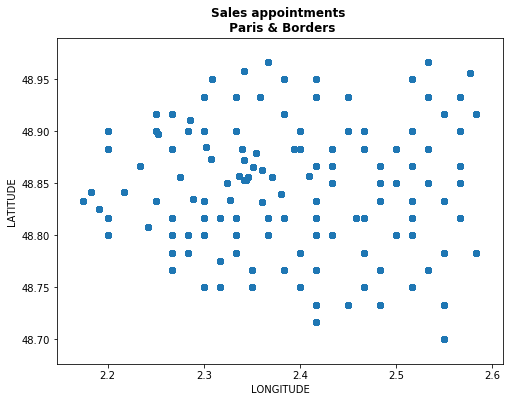

In [14]:
plt.figure(figsize=(8,6))

plt.scatter(df_focus["LONGITUDE"],df_focus["LATITUDE"])

plt.title("Sales appointments \n Paris & Borders", fontweight='bold', fontsize=12)
plt.xlabel("LONGITUDE")
plt.ylabel("LATITUDE")

plt.show()

# __NUMBER K OF CLUSTERS__ 

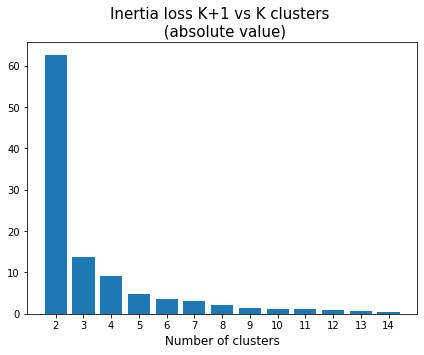

In [265]:
df_kmeans=df_focus[["LONGITUDE","LATITUDE"]].copy()

#simulated KMEANS for different K 
from sklearn.cluster import KMeans
km_inertia = []
K = range(1,15)
for i in K:
    km = KMeans(n_clusters=i)
    km = km.fit(df_kmeans)
    km_inertia.append(km.inertia_)
    
#Delta inertia__K+1  vs K 
Inertia_diff_lag=abs(pd.Series(km_inertia).diff())
Inertia_diff_lag.index=Inertia_diff_lag.index+1
Inertia_diff_lag=Inertia_diff_lag[Inertia_diff_lag.notnull()]

#plot
plt.figure(figsize=(7,5))
axes = plt.gca()
plt.bar(Inertia_diff_lag.index,Inertia_diff_lag)
plt.xticks(Inertia_diff_lag.index)
plt.title("Inertia loss K+1 vs K clusters \n (absolute value)", fontsize=15)
plt.xlabel("Number of clusters", fontsize=12)
plt.show()

#  __PLOT CLUSTERS AFTER K-MEANS__

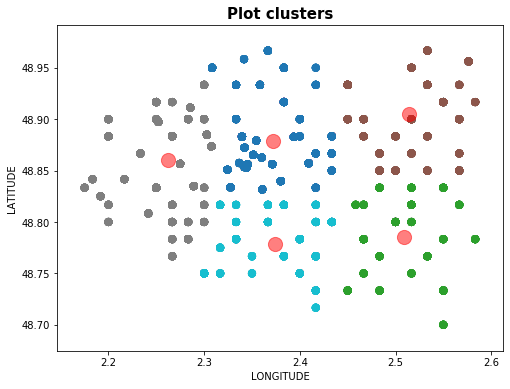

In [319]:
k=5

kmeans = KMeans(n_clusters=k)
kmeans.fit(df_kmeans)
centers = kmeans.cluster_centers_
df_focus["Cluster"]=kmeans.predict(df_focus[["LONGITUDE","LATITUDE"]])
                                            
#Rename K : K=1,2,.. instead of 0,1,..
df_focus["Cluster"]=df_focus["Cluster"]+1
                                            
#plot
plt.figure(figsize=(8,6))
                                            
plt.scatter(df_focus["LONGITUDE"], df_focus["LATITUDE"], c=df_focus["Cluster"], s=50, cmap='tab10')
plt.scatter(centers[:, 0],centers[:, 1], c='red', s=200, alpha=0.5)
                                            
plt.title("Plot clusters", fontsize=15, fontweight='bold')
plt.xlabel("LONGITUDE")
plt.ylabel("LATITUDE")
plt.show()

In [27]:
df_focus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8120 entries, 0 to 8119
Data columns (total 9 columns):
ID SALE APPOINTMENT      8120 non-null int64
SALE APPOINTMENT DATE    8120 non-null object
CITY                     8120 non-null object
ZIP CODE                 8120 non-null int64
DEPARTMENT               8120 non-null object
REGION                   8120 non-null object
LATITUDE                 8120 non-null float64
LONGITUDE                8120 non-null float64
Cluster                  8120 non-null int32
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 539.3+ KB


# __GRAPH CLEARER ABOUT DENSITY ZONES__

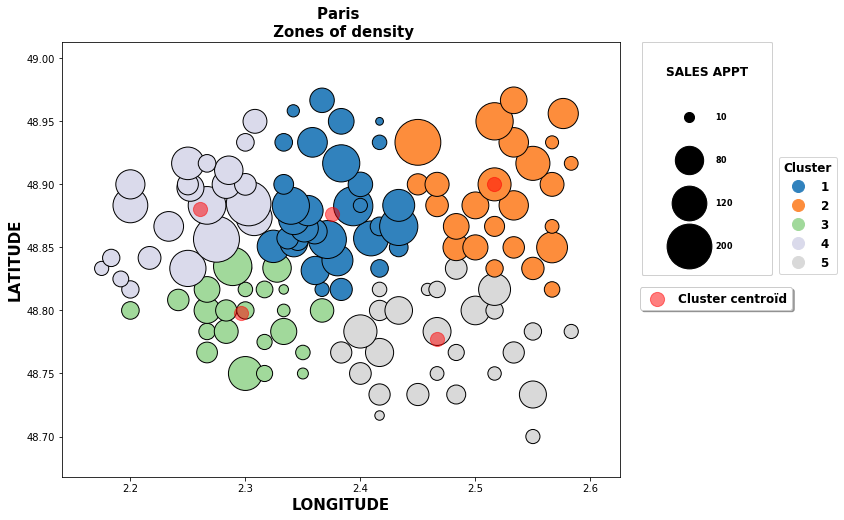

In [316]:
# Zipcode is not a key : in France, several cities can have the same zip code
#Weight by city
NB_APPT=df_focus.groupby(["LATITUDE","LONGITUDE","Cluster"]).agg(NB_APPT=pd.NamedAgg(column='ID SALE APPOINTMENT', aggfunc='nunique')).reset_index()
# pd.NamedAgg only works for pandas 0.25

#plot 
fig, ax = plt.subplots(figsize=(10,8))
x=NB_APPT["LONGITUDE"].copy()
y=NB_APPT["LATITUDE"].copy()
c=NB_APPT["Cluster"].copy()
d=NB_APPT["NB_APPT"].copy()

#size of bublles increased s=s*10
scatter=ax.scatter(x, y,c=c, cmap="tab20c",s=d*10,edgecolors= "black")

ax.scatter(centers[:, 0],centers[:, 1], c='red', s=200, alpha=0.5, label="Cluster centroïd")

legend1 = ax.legend(*scatter.legend_elements(), title="Cluster", loc="upper right",bbox_to_anchor=(1.4, 0.75),markerscale=2, prop={'size':12, "weight":'bold'})
ax.add_artist(legend1)
ax.get_legend().get_title().set_fontsize('12')
ax.get_legend().get_title().set_weight('bold')

legend2=ax.legend(loc='upper right', bbox_to_anchor=(1.32, 0.45), shadow=True, ncol=1, prop={'size':12, "weight":'bold'})
ax.add_artist(legend2)

#the real size of bubbles in the legend : s=s/10
kw = dict(prop="sizes", func=lambda s: s/10, num=[10, 80, 120, 200])
legend3 = ax.legend(*scatter.legend_elements(**kw), loc="upper right", title="SALES APPT", bbox_to_anchor=(1.28, 1.01),labelspacing=4, handletextpad=2.2,borderpad=3, prop={'size':8, 'weight':'bold'})
ax.add_artist(legend3)
ax.get_legend().get_title().set_fontsize('12')
ax.get_legend().get_title().set_weight('bold')

plt.title ("Paris \n Zones of density",fontweight='bold', fontsize=15)
plt.xlabel("LONGITUDE",fontweight='bold',fontsize=15)
plt.ylabel("LATITUDE",fontweight='bold',fontsize=15)
plt.show()

# __API PARAMETERS__

In [299]:
pd

<module 'pandas' from 'C:\\Users\\courriol.obouckang\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [61]:
#put your active key
API_KEY="your__api__key__from__google_cloud"

### departure_time = in integer seconds since January 1, 1970
departure_time=str((dt.datetime(2019,10,24,8,30,0)-dt.datetime(1970,1,1,23,59,59)).total_seconds())
departure_time=str(departure_time).split('.')[0]


#Mode="driving" #default value
#Units="metric" #default value

Traffic_model="best_guess" #default value, could take pessimistic, optimistic

#We can estimate time have a look when the traffic is congested
#Traffic_model="pessimistic"

# GOOGLE DISTANCE MATRIX API

## __DISTANCE & TRAVEL TIME BETWEEN TWO RANDOM POINTS__

### __Traffic_model="best_guess"__

In [64]:
Origins_coordinates= "48.7944,2.1414800000000014"
Destination_coordinates="48.9065,2.3215900000000147"
url="https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial"
url_call_api="{}{}{}{}{}{}{}{}{}{}{}".format(url,"&origins=",Origins_coordinates,"&destinations=",Destination_coordinates,"&traffic_model=",Traffic_model,"&departure_time=",departure_time,"&key=",API_KEY)

res=requests.get(url_call_api)

data=res.json()
data

{'destination_addresses': ['13 Rue Galien, 93400 Saint-Ouen, France'],
 'origin_addresses': ['47 Rue des Chantiers, 78000 Versailles, France'],
 'rows': [{'elements': [{'distance': {'text': '16.1 mi', 'value': 25831},
     'duration': {'text': '32 mins', 'value': 1934},
     'duration_in_traffic': {'text': '36 mins', 'value': 2159},
     'status': 'OK'}]}],
 'status': 'OK'}

### __Traffic_model="pessimistic"__


In [66]:
Origins_coordinates= "48.7944,2.1414800000000014"
Destination_coordinates="48.9065,2.3215900000000147"
url="https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial"
url_call_api="{}{}{}{}{}{}{}{}{}{}{}".format(url,"&origins=",Origins_coordinates,"&destinations=",Destination_coordinates,"&traffic_model=","pessimistic","&departure_time=",departure_time,"&key=",API_KEY)

res=requests.get(url_call_api)

data=res.json()
data

{'destination_addresses': ['13 Rue Galien, 93400 Saint-Ouen, France'],
 'origin_addresses': ['47 Rue des Chantiers, 78000 Versailles, France'],
 'rows': [{'elements': [{'distance': {'text': '16.1 mi', 'value': 25831},
     'duration': {'text': '32 mins', 'value': 1934},
     'duration_in_traffic': {'text': '53 mins', 'value': 3182},
     'status': 'OK'}]}],
 'status': 'OK'}

# __FUNCTION AUTOMATING CALCULATION WITH THE API__

In [88]:
def api_gmaps_request(longitude_orig,latitude_orig,longitude_dest,latitude_dest,API_KEY,departure_time,Traffic_model):
    
    longitude_orig=str(longitude_orig)
    latitude_orig=str(latitude_orig)
    longitude_dest=str(longitude_dest)
    latitude_dest=str(latitude_dest)
    Origins_gps=latitude_orig+","+longitude_orig
    Destination_gps=latitude_dest+","+longitude_dest

    Mode="driving"
    Units="metric" #Distance in KM instead of miles
    url_request="https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial"
    url=url_request+"&origins="+Origins_gps+"&destinations="+Destination_gps+"&traffic_model="+Traffic_model+"&departure_time="+departure_time+"&key="+API_KEY
    
    
    res=requests.get(url)
    data=res.json()
    
    if data["rows"][0]["elements"][0]["status"]=="OK":
        #data=pd.DataFrame(data['rows'])
        distance=round(data["rows"][0]["elements"][0]["distance"]["value"]/1000,2)
        travel_time=round(data["rows"][0]["elements"][0]["duration"]["value"]/60,2)
        travel_time_in_traffic=round(data["rows"][0]["elements"][0]["duration_in_traffic"]["value"]/60,2)
        result=[distance,travel_time,travel_time_in_traffic, data["rows"][0]["elements"][0]["status"]]
        
        return(result)
    else:
        return([0,0,0, data["rows"][0]["elements"][0]["status"]])


In [69]:
Clusters_name=("Cluster "*k).split()
for i in np.arange(k) : Clusters_name[i]=Clusters_name[i]+" "+str(i+1)
centers=np.insert(centers,2,np.arange(k)+1,axis=1)
centers_df=pd.DataFrame({"longitude_center":centers[:,0],"latitude_center":centers[:,1],"Cluster":centers[:,2], "Clusters_name":Clusters_name})
centers_df
    
df_focus=pd.merge(df_focus, centers_df,on="Cluster")
df_focus.head()

,ID SALE APPOINTMENT,SALE APPOINTMENT DATE,CITY,ZIP CODE,DEPARTMENT,REGION,LATITUDE,LONGITUDE,Cluster,longitude_center,latitude_center,Clusters_name
0,7027,2018-11-15 19:00:00,ST MANDE,94160,Val-de-Marne,ILE DE FRANCE,48.833333,2.416667,1,2.374986,48.876805,Cluster 1
1,8092,2018-12-28 14:15:00,STAINS,93240,Seine-Saint-Denis,ILE DE FRANCE,48.950000,2.383333,1,2.374986,48.876805,Cluster 1
2,6382,2018-10-20 16:00:00,PARIS,75020,Paris,ILE DE FRANCE,48.857126,2.409257,1,2.374986,48.876805,Cluster 1
3,827,2018-02-05 18:00:00,STAINS,93240,Seine-Saint-Denis,ILE DE FRANCE,48.950000,2.383333,1,2.374986,48.876805,Cluster 1
4,4274,2018-07-07 15:00:00,AUBERVILLIERS,93300,Seine-Saint-Denis,ILE DE FRANCE,48.916667,2.383333,1,2.374986,48.876805,Cluster 1


# __COORDONNEES GPS CENTER VS CLUSTER TO FIND THE TOP 5__

In [94]:
#df deduplicated,we just need to compute distance with unique cities
#important to deduplicate rows to avoid calling uselessly the API
df_focus_drop=df_focus.copy()
df_focus_drop=df_focus_drop.drop_duplicates(["LONGITUDE","LATITUDE","Cluster"])

#initialization 
df_focus_drop["REAL DISTANCE vs CENTROID"]=0.0

#for each city compute distance between city and the center of the cluster to which it belongs
for i in np.arange(df_focus_drop.shape[0]):
    
    longitude_orig=df_focus_drop.iloc[i]["longitude_center"]
    latitude_orig=df_focus_drop.iloc[i]["latitude_center"]
    
    longitude_dest=df_focus_drop.iloc[i]["LONGITUDE"]
    latitude_dest=df_focus_drop.iloc[i]["LATITUDE"]
    
    #print(longitude_orig,latitude_orig,longitude_dest,latitude_dest,API_KEY,departure_time)
    y=api_gmaps_request(longitude_orig,latitude_orig,longitude_dest,latitude_dest,API_KEY,departure_time,Traffic_model)
    
    pos_distance=df_focus_drop.columns.get_loc("REAL DISTANCE vs CENTROID")
    
    df_focus_drop.iloc[i,pos_distance]=y[0]

#sort cities by cluster, by distance
df_focus_drop=df_focus_drop.sort_values(["Cluster","REAL DISTANCE vs CENTROID"], ascending=[True,True])
df_focus_drop["Increment"]=df_focus_drop.groupby("Cluster").cumcount()

#Top5 of cities closest to each centroïd
Top_5=df_focus_drop.loc[df_focus_drop["Increment"]<=4].copy()

In [274]:
Top_5.loc[Top_5["Cluster"].isin([1,5,4])][["Cluster","CITY", "ZIP CODE", "REAL DISTANCE vs CENTROID"]]


,Cluster,CITY,ZIP CODE,REAL DISTANCE vs CENTROID
7,1,PARIS,75019,1.85
23,1,PARIS,75010,1.99
9,1,PARIS,75011,3.25
14,1,PARIS,75003,3.25
31,1,PARIS,75018,3.31
2337,4,NEUILLY SUR SEINE,92200,1.05
2351,4,PUTEAUX,92800,2.91
2367,4,COURBEVOIE,92400,2.99
2348,4,PARIS,75016,3.65
2344,4,PARIS,75017,3.66


# __DISPLAY THE TOP5 IN THE LAST PLOT__

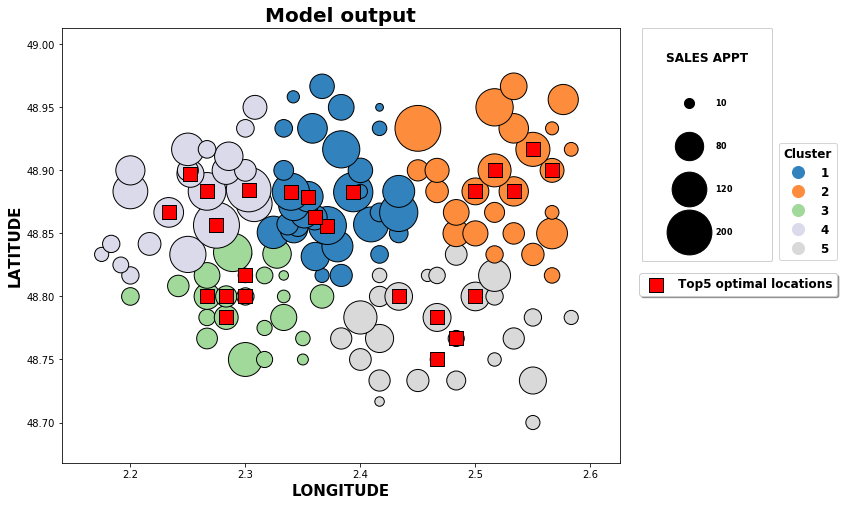

In [315]:
# Zipcode is not a key : in France, several cities can have the same zip code
#Weight by city
NB_APPT=df_focus.groupby(["LATITUDE","LONGITUDE","Cluster"]).agg(NB_APPT=pd.NamedAgg(column='ID SALE APPOINTMENT', aggfunc='nunique')).reset_index()
# pd.NamedAgg only works for pandas 0.25

#plot 
fig, ax = plt.subplots(figsize=(10,8))
x=NB_APPT["LONGITUDE"].copy()
y=NB_APPT["LATITUDE"].copy()
c=NB_APPT["Cluster"].copy()
d=NB_APPT["NB_APPT"].copy()

#size of bublles increased s=s*10
scatter=ax.scatter(x, y,c=c, cmap="tab20c",s=d*10,edgecolors= "black")
ax.scatter(Top_5["LONGITUDE"], Top_5["LATITUDE"],c="red", label="Top5 optimal locations", marker="s", edgecolors= "black",s=200)

legend1 = ax.legend(*scatter.legend_elements(), title="Cluster", loc="upper right",bbox_to_anchor=(1.4, 0.75),markerscale=2, prop={'size':12, "weight":'bold'})
ax.add_artist(legend1)
ax.get_legend().get_title().set_fontsize('12')
ax.get_legend().get_title().set_weight('bold')

legend2=ax.legend(loc='upper right', bbox_to_anchor=(1.4, 0.45), shadow=True, ncol=1, prop={'size':12, "weight":'bold'})
ax.add_artist(legend2)

#the real size of bubbles in the legend : s=s/10
kw = dict(prop="sizes", func=lambda s: s/10, num=[10, 80, 120, 200])
legend3 = ax.legend(*scatter.legend_elements(**kw), loc="upper right", title="SALES APPT", bbox_to_anchor=(1.28, 1.01),labelspacing=4, handletextpad=2.2,borderpad=3, prop={'size':8, 'weight':'bold'})
ax.add_artist(legend3)
ax.get_legend().get_title().set_fontsize('12')
ax.get_legend().get_title().set_weight('bold')

plt.title ("Model output",fontweight='bold', fontsize=20)
plt.xlabel("LONGITUDE",fontweight='bold',fontsize=15)
plt.ylabel("LATITUDE",fontweight='bold',fontsize=15)
plt.show()

# __CLUSTER DESCRIPTION__

In [136]:
df_focus[df_focus["Cluster"]==1].groupby(["CITY","ZIP CODE"]).count()['ID SALE APPOINTMENT'].reset_index().sort_values('ID SALE APPOINTMENT', ascending=False).head(10)

,CITY,ZIP CODE,ID SALE APPOINTMENT
25,PARIS,75019,154
10,MONTREUIL,93100,146
21,PARIS,75011,144
24,PARIS,75018,138
26,PARIS,75020,122
18,PARIS,75007,105
0,AUBERVILLIERS,93300,100
22,PARIS,75012,96
19,PARIS,75009,93
20,PARIS,75010,92


## __DATASET FOR A CARTOGRAPHY-DATAVIZ TOOL (QLIKSENSE, TABLEAU...)__

In [131]:
#RUN IF NEEDED, PUT COMMENTS OUT
#NB_APPT_2=df_focus.groupby(["LATITUDE","LONGITUDE","Cluster", "CITY"]).agg(NB_APPT=pd.NamedAgg(column='ID SALE APPOINTMENT', aggfunc='nunique')).reset_index()
#NB_APPT_2.head()

,LATITUDE,LONGITUDE,Cluster,CITY,NB_APPT
0,48.700000,2.550000,5,MANDRES LES ROSES,9
1,48.700000,2.550000,5,PERIGNY SUR YERRES,11
2,48.716667,2.416667,5,ABLON SUR SEINE,9
3,48.733333,2.416667,5,VILLENEUVE LE ROI,45
4,48.733333,2.450000,5,VILLENEUVE ST GEORGES,49


In [132]:
#NB_APPT_2.to_csv("AGGREG_MEDIUM_QLIKSENSE.csv", sep=";", index=False)

# __TRAVEL TIME & DISTANCE WITHIN-CLUSTER__

In [72]:
def metrics_inside_cluster(cluster):

    city_in_top5_total=pd.DataFrame()
    city_in_top5=pd.DataFrame()
    j=cluster


    cluster_j=df_focus_drop.loc[df_focus_drop["Cluster"]==j]
    city_in_top5=Top_5.loc[Top_5["Cluster"]==j,["Cluster","CITY","LONGITUDE","LATITUDE", "ZIP CODE"]]
    city_in_top5=city_in_top5.rename(columns={"CITY":"CITY_Top5","ZIP CODE":"Zip_Top5","LONGITUDE":"longitude_Top5","LATITUDE":"latitude_Top5" })

    city_in_top5["AVERAGE REAL DISTANCE"]=0.0
    city_in_top5["AVERAGE TRAVEL TIME"]=0.0
    city_in_top5["AVERAGE TRAVEL TIME TRAFFIC"]=0.0

    for v in np.arange(city_in_top5.shape[0]):

        position_long=city_in_top5.columns.get_loc("longitude_Top5")
        position_lat=city_in_top5.columns.get_loc("latitude_Top5")

        longitude_orig=city_in_top5.iloc[v,position_long]
        latitude_orig=city_in_top5.iloc[v,position_lat]
        moy_dist=[]
        moy_tps=[]
        moy_tps_trafic=[]
        for i in np.arange(cluster_j.shape[0]):
            position_long=cluster_j.columns.get_loc("LONGITUDE")
            position_lat=cluster_j.columns.get_loc("LATITUDE")
            longitude_dest=cluster_j.iloc[i,position_long]
            latitude_dest=cluster_j.iloc[i,position_lat]
            y=api_gmaps_request(longitude_orig,latitude_orig,longitude_dest,latitude_dest,API_KEY,departure_time,Traffic_model)
            #print(j,v,i)
            if y[3]=="OK":
                moy_dist.append(y[0])
                moy_tps.append(y[1])
                moy_tps_trafic.append(y[2])
        position_dist_moy=city_in_top5.columns.get_loc("AVERAGE REAL DISTANCE")
        position_tps_traj=city_in_top5.columns.get_loc("AVERAGE TRAVEL TIME")
        position_tps_traj_traf=city_in_top5.columns.get_loc("AVERAGE TRAVEL TIME TRAFFIC")

        city_in_top5.iloc[v,position_dist_moy]=np.mean(moy_dist)
        city_in_top5.iloc[v,position_tps_traj]=np.mean(moy_tps)
        city_in_top5.iloc[v,position_tps_traj_traf]=np.mean(moy_tps_trafic)        
    city_in_top5_total=pd.concat([city_in_top5_total,city_in_top5])
    return(city_in_top5_total)



# __RUN FOR EACH CLUSTER & CONCATENATION__ 
### __RUN IT ONE BY ONE TO AVOID SOME OBSERVED BUGS WHEN  CALLING THE API__

In [73]:
metrics_inside_1=metrics_inside_cluster(1)

In [75]:
metrics_inside_2=metrics_inside_cluster(2)

In [76]:
metrics_inside_3=metrics_inside_cluster(3)

In [77]:
metrics_inside_4=metrics_inside_cluster(4)

In [78]:
metrics_inside_5=metrics_inside_cluster(5)

In [297]:
metrics_all_clusters_df=pd.concat([metrics_inside_1,metrics_inside_2,metrics_inside_3,metrics_inside_4,metrics_inside_5])
metrics_all_clusters_df[["Cluster", "CITY_Top5", "Zip_Top5", "AVERAGE REAL DISTANCE","AVERAGE TRAVEL TIME"]].head(10)
#metrics_all_clusters_df.head(10)


,Cluster,CITY_Top5,Zip_Top5,AVERAGE REAL DISTANCE,AVERAGE TRAVEL TIME
7,1,PARIS,75019,7.147273,19.508485
23,1,PARIS,75010,7.490909,23.077273
9,1,PARIS,75011,6.831515,21.439394
14,1,PARIS,75003,6.353333,21.623636
31,1,PARIS,75018,8.633333,24.260303
4151,2,LE RAINCY,93340,6.861200,18.873200
4168,2,GAGNY,93220,7.350800,17.608400
4165,2,LIVRY GARGAN,93190,9.408000,20.322800
4157,2,VILLEMOMBLE,93250,7.788400,16.339200
4153,2,MONTFERMEIL,93370,8.902800,21.424400


In [83]:
#metrics_all_clusters_df.to_pickle("metrics_all_clusters_df__MEDIUM")

# HEATMAP

## TRAVEL TIME FROM EXISTING AGENCIES TO CLUSTERSM AGENCIES TO CLUSTER

In [99]:
## Fake Id, just a trick to merge each cluster to each current agencies (fake) 
#in order to calculate travel time between both
Top_5__1=Top_5[["Cluster", "CITY","ZIP CODE","LONGITUDE","LATITUDE"]].copy()
Top_5__1["Id"]=1

Top_5__2=Top_5[["Cluster", "CITY","ZIP CODE","LONGITUDE","LATITUDE"]].copy()
Top_5__2["Id"]=2

Top_5__=pd.concat([Top_5__1, Top_5__2])

#agencies longitude & latitude
long_ag=[2.382000000000062,2.31230000000005]
lat_ag=[48.8828,48.7978]
current_agencies=pd.DataFrame({"long_ag":long_ag,"lat_ag":lat_ag, "Id":[1,2]})

Top_5__=pd.merge(Top_5__,current_agencies,on="Id", how="left").sort_values(["Cluster","CITY"])
Top_5__.head(10)

,Cluster,CITY,ZIP CODE,LONGITUDE,LATITUDE,Id,long_ag,lat_ag
0,1,PARIS,75019,2.393775,48.882715,1,2.3820,48.8828
1,1,PARIS,75010,2.354391,48.879201,1,2.3820,48.8828
2,1,PARIS,75011,2.371330,48.856244,1,2.3820,48.8828
3,1,PARIS,75003,2.360277,48.862648,1,2.3820,48.8828
4,1,PARIS,75018,2.339544,48.883073,1,2.3820,48.8828
25,1,PARIS,75019,2.393775,48.882715,2,2.3123,48.7978
26,1,PARIS,75010,2.354391,48.879201,2,2.3123,48.7978
27,1,PARIS,75011,2.371330,48.856244,2,2.3123,48.7978
28,1,PARIS,75003,2.360277,48.862648,2,2.3123,48.7978
29,1,PARIS,75018,2.339544,48.883073,2,2.3123,48.7978


In [102]:
##  time/distance between clusters and current agencies 
Top_5__["REAL TIME"]=0
Top_5__["DISTANCE"]=0

pos_long=Top_5__.columns.get_loc("LONGITUDE")
pos_lat=Top_5__.columns.get_loc("LATITUDE")

pos_long_ag=Top_5__.columns.get_loc("long_ag")
pos_lat_ag=Top_5__.columns.get_loc("lat_ag")

pos_tps=Top_5__.columns.get_loc("REAL TIME")
pos_dist=Top_5__.columns.get_loc("DISTANCE")

for i in np.arange(len(Top_5__)):
    
    longitude_orig=Top_5__.iloc[i,pos_long_ag]
    latitude_orig=Top_5__.iloc[i,pos_lat_ag]
    
    longitude_dest=Top_5__.iloc[i,pos_long]
    latitude_dest=Top_5__.iloc[i,pos_lat]
    
    requete=api_gmaps_request(longitude_orig,latitude_orig,longitude_dest,latitude_dest,API_KEY,departure_time,Traffic_model)

    
    Top_5__.iloc[i,pos_tps]=requete[1]
    Top_5__.iloc[i,pos_dist]=requete[0] 

    

In [103]:
Top_5__.head(10)

,Cluster,CITY,ZIP CODE,LONGITUDE,LATITUDE,Id,long_ag,lat_ag,REAL TIME,DISTANCE
0,1,PARIS,75019,2.393775,48.882715,1,2.3820,48.8828,3.55,1.07
1,1,PARIS,75010,2.354391,48.879201,1,2.3820,48.8828,12.37,2.48
2,1,PARIS,75011,2.371330,48.856244,1,2.3820,48.8828,19.08,4.86
3,1,PARIS,75003,2.360277,48.862648,1,2.3820,48.8828,20.42,4.74
4,1,PARIS,75018,2.339544,48.883073,1,2.3820,48.8828,17.05,3.58
25,1,PARIS,75019,2.393775,48.882715,2,2.3123,48.7978,28.27,16.72
26,1,PARIS,75010,2.354391,48.879201,2,2.3123,48.7978,37.23,10.47
27,1,PARIS,75011,2.371330,48.856244,2,2.3123,48.7978,26.88,13.00
28,1,PARIS,75003,2.360277,48.862648,2,2.3123,48.7978,30.47,14.14
29,1,PARIS,75018,2.339544,48.883073,2,2.3123,48.7978,40.72,20.37


# HEATMAP PLOT



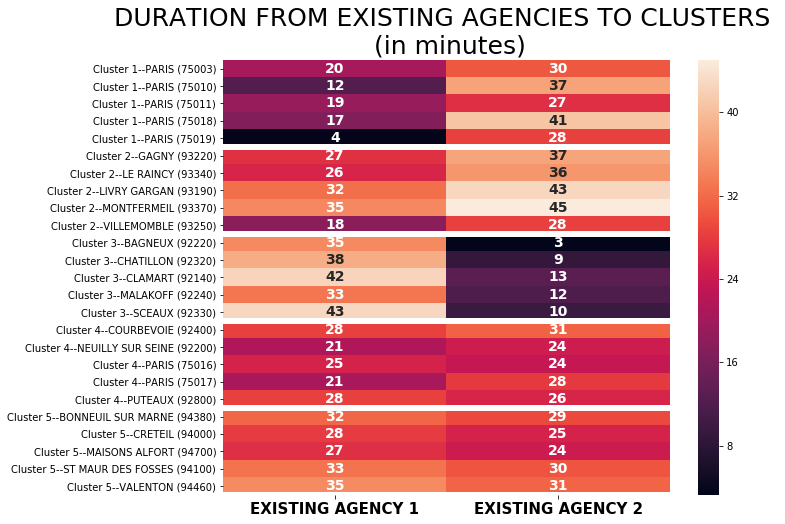

In [342]:
Top_5__["CITY_AND_CLUSTER"]=""
pos_CITY=Top_5__.columns.get_loc("CITY")
pos_Cluster=Top_5__.columns.get_loc("Cluster")
pos_ZIP_CODE=Top_5__.columns.get_loc("ZIP CODE")
pos_CITY_AND_CLUSTER=Top_5__.columns.get_loc("CITY_AND_CLUSTER")

for i in np.arange(len(Top_5__)):
    Top_5__.iloc[i,pos_CITY_AND_CLUSTER]="Cluster "+str(Top_5__.iloc[i,pos_Cluster])+"--"+str(Top_5__.iloc[i,pos_CITY])+" ("+str(Top_5__.iloc[i,pos_ZIP_CODE])+")"

Top_5__p=pd.pivot_table(Top_5__, columns=["Id"], index="CITY_AND_CLUSTER", values="REAL TIME")

#rename Id by agencies name
Dico_rename={1:"EXISTING AGENCY 1", 2:"EXISTING AGENCY 2"}
Top_5__p=Top_5__p.rename(columns=Dico_rename)
Top_5__p.head(10)

plt.figure(figsize=(10,8))

p=sns.heatmap(Top_5__p, annot=True,yticklabels=True, annot_kws={"weight": "bold", "fontsize":14}, fmt='.0f')
p.set_xlabel('')
p.set_ylabel('')
p.set(ylim=(25,0))
plt.ylim

p.set_xticklabels(p.get_xticklabels(), fontsize=15, weight='bold')
plt.title("DURATION FROM EXISTING AGENCIES TO CLUSTERS \n (in minutes)", fontsize=25)
p.hlines([5, 10, 15,20,25], *p.get_xlim(), color="white", linewidth=6)

plt.show()